In [1]:
import tensorflow as tf
from tensorflow.keras import layers
import pandas as pd
import numpy as np

In [2]:
#reading data
data = pd.read_csv('iris_dataset.csv')

data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [3]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

#encoding variety as target 

X = data.drop('variety', axis=1)
y = data['variety']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)


In [4]:
X.shape, y_categorical.shape

((150, 4), (150, 3))

In [5]:
y_categorical[0]

array([1., 0., 0.], dtype=float32)

In [6]:
import random
RANDOM_STATE = 15

random.seed(15)
np.random.seed(15)

In [7]:
from sklearn.model_selection import train_test_split

#splitting 80 20
X_temp, X_test, y_temp, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=RANDOM_STATE, shuffle=True)

#splitting temp to 75 - 20
#after splitting, train: 60&%, test: 20%, validation: 20%
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=RANDOM_STATE, shuffle=True)

In [8]:
y_test.shape

(30, 3)

In [10]:
'''Model definition'''
from tensorflow import keras

model = keras.Sequential([
    layers.Dense(30, activation="relu"),
    layers.Dense(30, activation="relu"),
    layers.Dense(3, activation="softmax")
])

#y_test.shape

In [11]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [12]:
''' Training your model'''
history = model.fit(X_train,
                    y_train,
                    epochs=25,
                    batch_size=10,
                    validation_data=(X_val, y_val))

Epoch 1/25
9/9 [==============================] - 0s 11ms/step - loss: 1.0997 - accuracy: 0.4000 - val_loss: 0.9408 - val_accuracy: 0.4333
Epoch 2/25
9/9 [==============================] - 0s 2ms/step - loss: 0.9692 - accuracy: 0.5667 - val_loss: 0.8927 - val_accuracy: 0.8667
Epoch 3/25
9/9 [==============================] - 0s 2ms/step - loss: 0.8973 - accuracy: 0.7778 - val_loss: 0.8358 - val_accuracy: 0.6667
Epoch 4/25
9/9 [==============================] - 0s 2ms/step - loss: 0.8251 - accuracy: 0.8333 - val_loss: 0.7835 - val_accuracy: 0.7000
Epoch 5/25
9/9 [==============================] - 0s 2ms/step - loss: 0.7723 - accuracy: 0.7444 - val_loss: 0.7405 - val_accuracy: 0.8667
Epoch 6/25
9/9 [==============================] - 0s 2ms/step - loss: 0.7074 - accuracy: 0.7889 - val_loss: 0.7041 - val_accuracy: 0.9333
Epoch 7/25
9/9 [==============================] - 0s 2ms/step - loss: 0.6553 - accuracy: 0.8667 - val_loss: 0.6367 - val_accuracy: 0.7000
Epoch 8/25
9/9 [=================

In [13]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

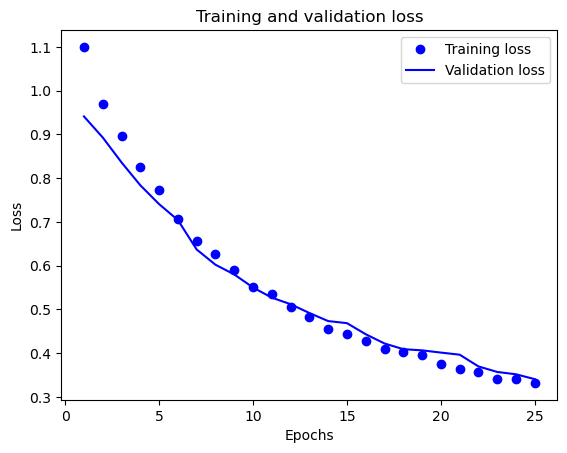

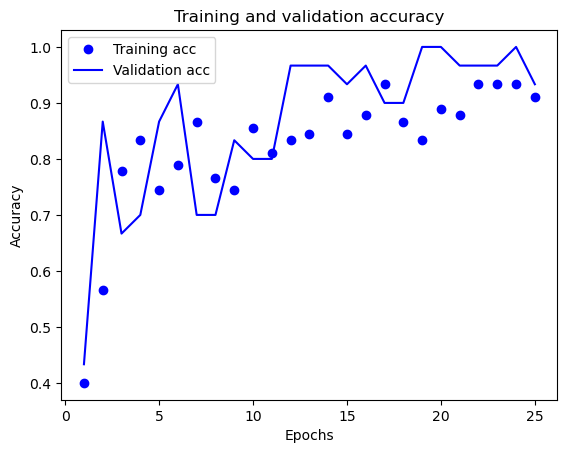

In [14]:
'''Plotting the training and validation loss'''

import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

#"bo" is for blue dot.
plt.plot(epochs, loss_values, "bo", label="Training loss")

#"b" is for solid blue line.
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


''' Plotting the training and validation accuracy'''

#Clears the figure
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [15]:
'''Retraining a model from scratch'''
model = keras.Sequential([
  layers.Dense(25, activation="relu"),
  layers.Dense(25, activation="relu"),
  layers.Dense(3, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(X_train,
          y_train,
          epochs=18,
          batch_size=10)


Epoch 1/18
9/9 [==============================] - 0s 699us/step - loss: 1.0627 - accuracy: 0.4889
Epoch 2/18
9/9 [==============================] - 0s 769us/step - loss: 0.9260 - accuracy: 0.7556
Epoch 3/18
9/9 [==============================] - 0s 722us/step - loss: 0.8550 - accuracy: 0.7778
Epoch 4/18
9/9 [==============================] - 0s 737us/step - loss: 0.8012 - accuracy: 0.6889
Epoch 5/18
9/9 [==============================] - 0s 690us/step - loss: 0.7508 - accuracy: 0.6889
Epoch 6/18
9/9 [==============================] - 0s 737us/step - loss: 0.7170 - accuracy: 0.7444
Epoch 7/18
9/9 [==============================] - 0s 690us/step - loss: 0.6747 - accuracy: 0.7222
Epoch 8/18
9/9 [==============================] - 0s 739us/step - loss: 0.6411 - accuracy: 0.8333
Epoch 9/18
9/9 [==============================] - 0s 694us/step - loss: 0.6126 - accuracy: 0.7333
Epoch 10/18
9/9 [==============================] - 0s 756us/step - loss: 0.5798 - accuracy: 0.7889
Epoch 11/18
9/9 [==

In [16]:
results = model.evaluate(X_test, y_test)
results

1/1 [==============================] - 0s 57ms/step - loss: 0.4483 - accuracy: 0.9000


[0.4483412206172943, 0.8999999761581421]

In [17]:
#the test accuracy of the model is approximately 90% accurate
#the test loss is about 45%

In [18]:
predictions = model.predict(X_test)

1/1 [==============================] - 0s 37ms/step


In [19]:
#calculating accuracy manually 
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)
comparison_array = predicted_labels == true_labels
accuracy = np.mean(comparison_array)
print(f"Accuracy: {accuracy*100}%")

Accuracy: 90.0%
